Contents

1. Importing Libraries and Data Set
2. Data Prep For Regression Analysis With Altitude
3. Regression Analysis With Altitude
4. Data Prep For Regression Analysis With Moisture Percentage
5. Regression Analysis With Moisture Percentage
6. Thoughts

# 1. Importing Libraries and Data Set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Set path

path = r'/Users/danioprea/Desktop/Data Analytics/Coffee Quality Analysis - Dani Oprea'

In [4]:
# Import data set with pandas

df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'coffee_final.pkl'))

In [5]:
df.head(50)

,Country of Origin,Farm Name,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,Harvest Year,Grading Date,...,Uniformity,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Rating Category
0,Colombia,Finca El Paraiso,Coffee Quality Union,1815.0,"Piendamo,Cauca",Diego Samuel Bermudez,1,35 kg,2021 / 2022,2022-09-21,...,10.0,8.58,89.33,11.8,0,0,green,3,"September 21st, 2023",High Rating
1,Taiwan,Royal Bean Geisha Estate,Taiwan Coffee Laboratory,1200.0,Chiayi,曾福森,1,80 kg,2021 / 2022,2022-11-15,...,10.0,8.50,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",High Rating
2,Laos,OKLAO coffee farms,Taiwan Coffee Laboratory,1300.0,Laos Borofen Plateau,WU TAO CHI,19,25 kg,2021 / 2022,2022-11-15,...,10.0,8.33,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",High Rating
3,Costa Rica,La Cumbre,Coffee Quality Union,1900.0,"Los Santos,Tarrazu",Santa Maria de Dota,1,22 kg,2022,2022-09-21,...,10.0,8.25,87.17,11.8,0,0,green,0,"September 21st, 2023",High Rating
4,Colombia,Finca Santuario,Coffee Quality Union,1975.0,"Popayan,Cauca",Camilo Merizalde,2,24 kg,2022,2023-03-06,...,10.0,8.25,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",High Rating
5,Guatemala,La Colina,Taiwan Coffee Laboratory,1668.0,Chimaltenango,Emilio Antonio Medina Garcia,5,30 kg,2022,2022-11-15,...,10.0,8.25,87.00,10.7,0,0,green,2,"November 15th, 2023",High Rating
6,Taiwan,野牡丹咖啡莊園 Melastoma Coffee Estate,Taiwan Coffee Laboratory,1250.0,Chiayi,黃保錫,1,27 kg,2021 / 2022,2022-11-15,...,10.0,8.25,86.92,9.1,0,0,green,0,"November 15th, 2023",High Rating
7,Taiwan,七彩琉璃咖啡莊園 Chi Tsai Liu Li Ecological Farm,Taiwan Coffee Laboratory,1200.0,Chiayi,莊家榮,1,90 kg,2021 / 2022,2022-11-15,...,10.0,8.08,86.75,10.0,0,0,yellow-green,1,"November 15th, 2023",High Rating
8,Taiwan,亮軒咖啡莊園 Liang Xuan Coffee Farm,Taiwan Coffee Laboratory,1250.0,Chiayi,鍾旭亮,1,30 kg,2021 / 2022,2022-11-15,...,10.0,8.25,86.67,10.8,0,0,greenish,0,"November 15th, 2023",High Rating
9,"Tanzania, United Republic Of",MASHIMA AMCOS,DORMAN (T) LIMITED,1550.0,KILIMANJARO,DORMAN (T) LIMITED,320,60 kg,2022 / 2023,2023-02-01,...,10.0,8.00,86.50,11.0,0,0,greenish,0,"February 1st, 2024",High Rating


In [6]:
df.shape

(197, 28)

In [7]:
# Create the subset of top countries

df_country = df[df['Country of Origin'].str.contains('Ethiopia|Tanzania, United Republic Of|Guatemala|Taiwan')]

In [8]:
df_country

,Country of Origin,Farm Name,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,Harvest Year,Grading Date,...,Uniformity,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Rating Category
1,Taiwan,Royal Bean Geisha Estate,Taiwan Coffee Laboratory,1200.0,Chiayi,曾福森,1,80 kg,2021 / 2022,2022-11-15,...,10.0,8.50,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",High Rating
5,Guatemala,La Colina,Taiwan Coffee Laboratory,1668.0,Chimaltenango,Emilio Antonio Medina Garcia,5,30 kg,2022,2022-11-15,...,10.0,8.25,87.00,10.7,0,0,green,2,"November 15th, 2023",High Rating
6,Taiwan,野牡丹咖啡莊園 Melastoma Coffee Estate,Taiwan Coffee Laboratory,1250.0,Chiayi,黃保錫,1,27 kg,2021 / 2022,2022-11-15,...,10.0,8.25,86.92,9.1,0,0,green,0,"November 15th, 2023",High Rating
7,Taiwan,七彩琉璃咖啡莊園 Chi Tsai Liu Li Ecological Farm,Taiwan Coffee Laboratory,1200.0,Chiayi,莊家榮,1,90 kg,2021 / 2022,2022-11-15,...,10.0,8.08,86.75,10.0,0,0,yellow-green,1,"November 15th, 2023",High Rating
8,Taiwan,亮軒咖啡莊園 Liang Xuan Coffee Farm,Taiwan Coffee Laboratory,1250.0,Chiayi,鍾旭亮,1,30 kg,2021 / 2022,2022-11-15,...,10.0,8.25,86.67,10.8,0,0,greenish,0,"November 15th, 2023",High Rating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,Taiwan,拉拉山祖嵐咖啡莊園,Taiwu Coffee Cooperative,500.0,桃園市,宗素霞,1,20 kg,2021 / 2022,2023-01-06,...,10.0,7.42,82.00,8.2,0,0,green,1,"January 6th, 2024",Middle Rating
180,Guatemala,MULTIPLE SMALLHOLDER FARMS,"HARU International Corp, 守成咖啡",1400.0,Antigua,La Minita,540,30 kg,2022,2022-11-03,...,10.0,7.42,81.92,10.3,0,0,greenish,1,"November 3rd, 2023",Low Rating
181,Taiwan,阿拉思家,Taiwu Coffee Cooperative,300.0,桃園市,李秀圓,1,6 kg,2021 / 2022,2023-01-06,...,10.0,7.42,81.83,11.3,0,0,green,0,"January 6th, 2024",Low Rating
188,Taiwan,橫鹿,Taiwu Coffee Cooperative,300.0,新北市,呂星輝,1,100 kg,2021 / 2022,2023-01-06,...,10.0,7.33,81.58,9.0,0,0,yellow-green,0,"January 6th, 2024",Low Rating


In [9]:
df_country.shape

(96, 28)

# 2. Data Prep For Regression Analysis With Altitude

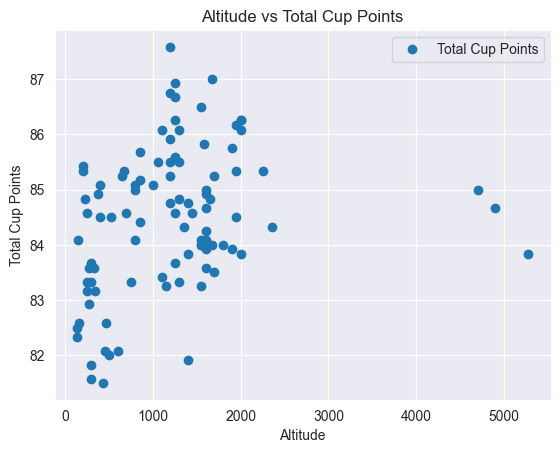

In [10]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_country.plot(x = 'Altitude', y='Total Cup Points',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Altitude vs Total Cup Points')  
plt.xlabel('Altitude')  
plt.ylabel('Total Cup Points')  
plt.show()

#### Hypothesis

A high altitude leads to a coffee being higher rated.

In [11]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_country['Altitude'].values.reshape(-1,1)
y = df_country['Total Cup Points'].values.reshape(-1,1)

In [12]:
X

array([[1200. ],
       [1668. ],
       [1250. ],
       [1200. ],
       [1250. ],
       [1550. ],
       [2000. ],
       [2000. ],
       [1250. ],
       [1950. ],
       [1100. ],
       [2000. ],
       [1300. ],
       [1200. ],
       [1585. ],
       [1900. ],
       [ 850. ],
       [1250. ],
       [1300. ],
       [1200. ],
       [1060. ],
       [ 200. ],
       [ 200. ],
       [ 668. ],
       [1950. ],
       [2250. ],
       [1700. ],
       [1200. ],
       [ 650. ],
       [ 850. ],
       [ 400. ],
       [1000. ],
       [ 800. ],
       [ 800. ],
       [1600. ],
       [4700. ],
       [1600. ],
       [ 375. ],
       [ 230. ],
       [1654. ],
       [1300. ],
       [1400. ],
       [1200. ],
       [1600. ],
       [4895. ],
       [ 250. ],
       [ 700. ],
       [1250. ],
       [1450. ],
       [ 520. ],
       [1943. ],
       [ 400. ],
       [ 850. ],
       [1350. ],
       [2361. ],
       [1600. ],
       [1600. ],
       [ 150. ],
       [ 800. 

In [13]:
y

array([[87.58],
       [87.  ],
       [86.92],
       [86.75],
       [86.67],
       [86.5 ],
       [86.25],
       [86.25],
       [86.25],
       [86.17],
       [86.08],
       [86.08],
       [86.08],
       [85.92],
       [85.83],
       [85.75],
       [85.67],
       [85.58],
       [85.5 ],
       [85.5 ],
       [85.5 ],
       [85.42],
       [85.33],
       [85.33],
       [85.33],
       [85.33],
       [85.25],
       [85.25],
       [85.25],
       [85.17],
       [85.08],
       [85.08],
       [85.08],
       [85.  ],
       [85.  ],
       [85.  ],
       [84.92],
       [84.92],
       [84.83],
       [84.83],
       [84.83],
       [84.75],
       [84.75],
       [84.67],
       [84.67],
       [84.58],
       [84.58],
       [84.58],
       [84.58],
       [84.5 ],
       [84.5 ],
       [84.5 ],
       [84.42],
       [84.33],
       [84.33],
       [84.25],
       [84.08],
       [84.08],
       [84.08],
       [84.08],
       [84.  ],
       [84.  ],
       [

In [14]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 3. Regression Analysis with Altitude

In [15]:
# Create a regression object.

regression = LinearRegression() 

In [16]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

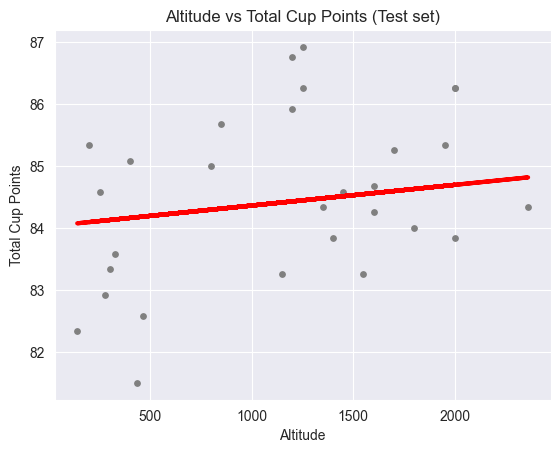

In [18]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Altitude vs Total Cup Points (Test set)')
plot_test.xlabel('Altitude')
plot_test.ylabel('Total Cup Points')
plot_test.show()

#### Interpretation

The line does not really do a good job of fitting the data. It is almost very flat and there are data points far from the line.

In [19]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [20]:
# Print the model summary statistics. This is where we evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0003336]]
Mean squared error:  1.646503734946974
R2 score:  0.0913002059601915


In [21]:
y_predicted

array([[84.59506186],
       [84.1196841 ],
       [84.44494257],
       [84.56170202],
       [84.69514139],
       [84.41158272],
       [84.31150319],
       [84.12802406],
       [84.81557042],
       [84.49498233],
       [84.47830241],
       [84.07464831],
       [84.13636402],
       [84.42826264],
       [84.69514139],
       [84.1613839 ],
       [84.09466422],
       [84.67846146],
       [84.29482327],
       [84.44494257],
       [84.56170202],
       [84.6284217 ],
       [84.42826264],
       [84.1830678 ],
       [84.11134414],
       [84.51166225],
       [84.69514139],
       [84.17305985],
       [84.54502209]])

In [22]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,85.25,84.595062
1,82.92,84.119684
2,86.92,84.444943
3,84.25,84.561702
4,83.83,84.695141
5,83.25,84.411583
6,85.67,84.311503
7,83.33,84.128024
8,84.33,84.815570
9,83.83,84.494982


#### Compare how the regression fits the training set

In [23]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [24]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [25]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0003336]]
Mean squared error:  1.552970163324344
R2 score:  0.06464154467834704


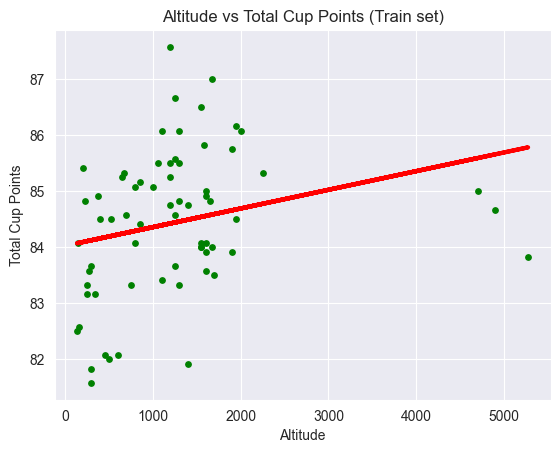

In [26]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Altitude vs Total Cup Points (Train set)')
plot_test.xlabel('Altitude')
plot_test.ylabel('Total Cup Points')
plot_test.show()

#### Thoughts

Based on our MSE and r-squared values, our model is not performing well, which is not surprising given that the data is far from linear. Let's test moisture percentage as well to be sure.

# 4. Data Prep For Regression Analysis With Moisture Percentage

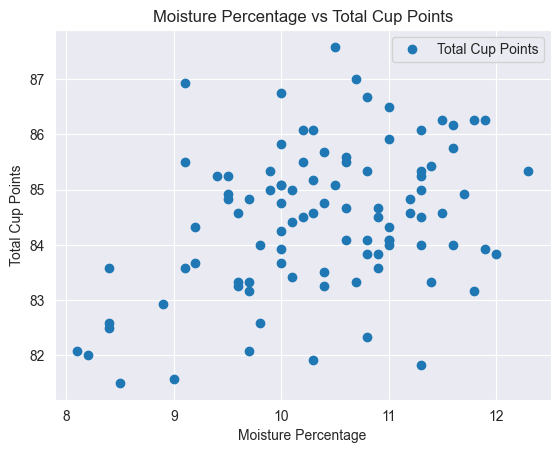

In [27]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_country.plot(x = 'Moisture Percentage', y='Total Cup Points',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Moisture Percentage vs Total Cup Points')  
plt.xlabel('Moisture Percentage')  
plt.ylabel('Total Cup Points')  
plt.show()

#### Hypothesis

A high moisture percentage leads to a coffee being higher rated.

In [28]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_country['Moisture Percentage'].values.reshape(-1,1)
y = df_country['Total Cup Points'].values.reshape(-1,1)

In [29]:
X

array([[10.5],
       [10.7],
       [ 9.1],
       [10. ],
       [10.8],
       [11. ],
       [11.8],
       [11.5],
       [11.9],
       [11.6],
       [10.2],
       [11.3],
       [10.3],
       [11. ],
       [10. ],
       [11.6],
       [10.4],
       [10.6],
       [ 9.1],
       [10.6],
       [10.2],
       [11.4],
       [10.8],
       [11.3],
       [ 9.9],
       [12.3],
       [ 9.4],
       [ 9.5],
       [11.3],
       [10.3],
       [10. ],
       [10.5],
       [10. ],
       [10.1],
       [ 9.9],
       [11.3],
       [11.7],
       [ 9.5],
       [ 9.7],
       [11.2],
       [ 9.5],
       [10.4],
       [10. ],
       [10.6],
       [10.9],
       [ 9.6],
       [11.5],
       [11.2],
       [10.3],
       [11.3],
       [10.9],
       [10.2],
       [10.1],
       [ 9.2],
       [11. ],
       [10. ],
       [11. ],
       [10.8],
       [10.6],
       [11. ],
       [11. ],
       [ 9.8],
       [11.3],
       [11.6],
       [11.9],
       [10. ],
       [10

In [30]:
y

array([[87.58],
       [87.  ],
       [86.92],
       [86.75],
       [86.67],
       [86.5 ],
       [86.25],
       [86.25],
       [86.25],
       [86.17],
       [86.08],
       [86.08],
       [86.08],
       [85.92],
       [85.83],
       [85.75],
       [85.67],
       [85.58],
       [85.5 ],
       [85.5 ],
       [85.5 ],
       [85.42],
       [85.33],
       [85.33],
       [85.33],
       [85.33],
       [85.25],
       [85.25],
       [85.25],
       [85.17],
       [85.08],
       [85.08],
       [85.08],
       [85.  ],
       [85.  ],
       [85.  ],
       [84.92],
       [84.92],
       [84.83],
       [84.83],
       [84.83],
       [84.75],
       [84.75],
       [84.67],
       [84.67],
       [84.58],
       [84.58],
       [84.58],
       [84.58],
       [84.5 ],
       [84.5 ],
       [84.5 ],
       [84.42],
       [84.33],
       [84.33],
       [84.25],
       [84.08],
       [84.08],
       [84.08],
       [84.08],
       [84.  ],
       [84.  ],
       [

In [31]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 5. Regression Analysis with Moisture Percentage

In [32]:
# Create a regression object.

regression = LinearRegression() 

In [33]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [34]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

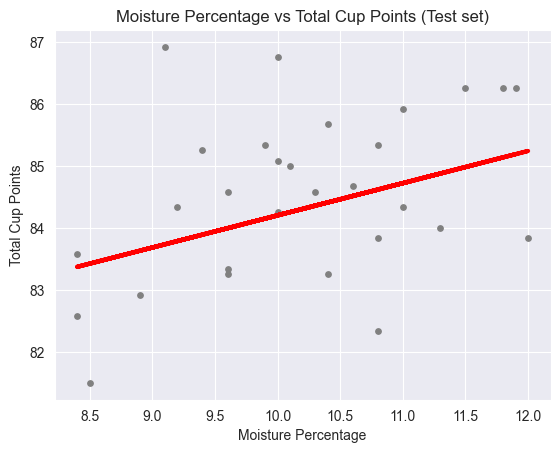

In [35]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Moisture Percentage vs Total Cup Points (Test set)')
plot_test.xlabel('Moisture Percentage')
plot_test.ylabel('Total Cup Points')
plot_test.show()

#### Interpretation

This line is also not a really good fit to the data. While it is not as flat, it is still very far from most of the data points. 

In [36]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [37]:
# Print the model summary statistics. This is where we evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.51931901]]
Mean squared error:  1.5651962192895508
R2 score:  0.13617354645957924


In [38]:
y_predicted

array([[83.89176642],
       [83.63210691],
       [83.73597071],
       [84.20335783],
       [85.24199585],
       [83.99563022],
       [84.41108543],
       [83.99563022],
       [84.72267684],
       [84.61881304],
       [83.78790262],
       [84.61881304],
       [83.3724474 ],
       [84.72267684],
       [84.98233635],
       [84.20335783],
       [84.61881304],
       [84.15142593],
       [84.25528973],
       [85.19006395],
       [84.51494923],
       [84.87847254],
       [84.20335783],
       [83.3724474 ],
       [83.99563022],
       [84.35915353],
       [85.13813205],
       [83.42437931],
       [84.41108543]])

In [39]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,85.25,83.891766
1,82.92,83.632107
2,86.92,83.735971
3,84.25,84.203358
4,83.83,85.241996
5,83.25,83.995630
6,85.67,84.411085
7,83.33,83.995630
8,84.33,84.722677
9,83.83,84.618813


#### Compare how the regression fits the training set

In [40]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [41]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [42]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.51931901]]
Mean squared error:  1.44526009092534
R2 score:  0.1295156351927792


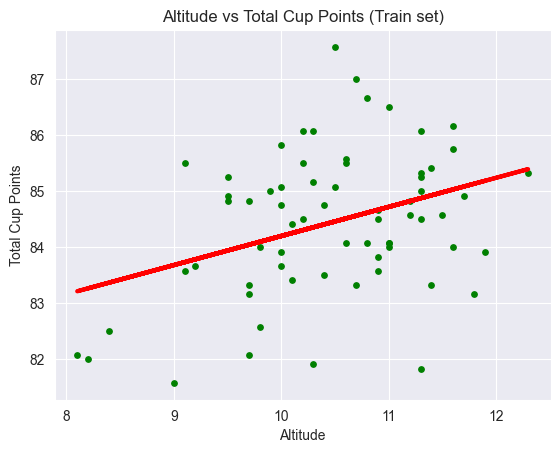

In [43]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Altitude vs Total Cup Points (Train set)')
plot_test.xlabel('Altitude')
plot_test.ylabel('Total Cup Points')
plot_test.show()

#### Thoughts

Based on our MSE and r-squared values, our model is not performing well. It is performing better than it was for altitude but still not very great.

# 6. Thoughts

Neither model performed very well with the data. It's not surprising considering the data isn't very linear. We'll see if we can do anything with the clustering analysis.